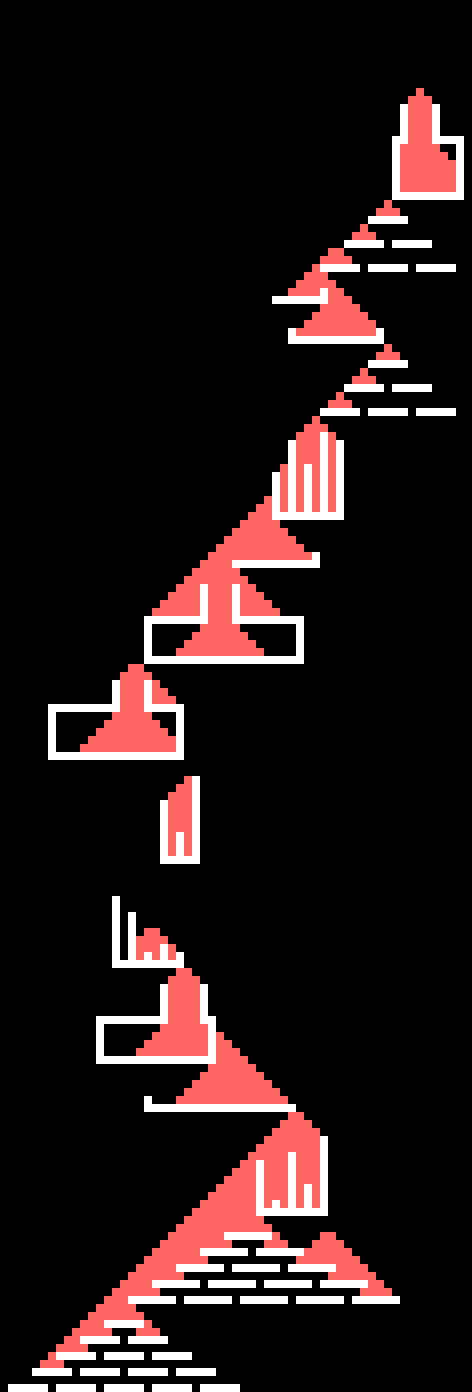

part1: 799 799


In [1]:
import re
import sys
import cv2
import time
import numpy as np
from PIL import Image
from IPython import display

#sys.setrecursionlimit(10000)

def sign(a):
    if a > 0:
        return 1
    elif a < 0:
        return -1
    return 0

def ld():
    walls = []
    for l in open("14.txt").read().split('\n'):
        points=[[int(y) for y in x.split(',')] for x in l.split(" -> ")]
        #print(points)
        for i in range(len(points)-1):
            x0,y0 = points[i]
            x1,y1 = points[i+1]
            x=x0
            y=y0
            for i in range((abs(x1-x0)+abs(y1-y0)+1)):
                if not (x,y) in walls:
                    walls.append((x,y))

                x+=sign(x1-x)
                y+=sign(y1-y)
    X=[]
    Y=[]
    for wx,wy in walls:
        X.append(wx)
        Y.append(wy)
    x0=min(X)-1
    x1=max(X)+1
    y0=0
    #min(Y)
    y1=max(Y)
    #rock and settled sand
    M={}

    #drips=[]
    for p in zip(X,Y):
        M[p]=0
    return M,x0,x1,y0,y1

def printmap(  M,x0,x1,y0,y1 ):
    C=[[255,255,255],[255,100,100],[0,255,0]]
    w=x1-x0+1
    h=y1-y0+1
    pix = np.zeros([h,w,3]).astype(np.ubyte)
    for x,y in M.keys():
        if x>=x0 and x<=x1:
            if y>=y0 and y<=y1:
                pix[y-y0,x-x0,:]=C[M[(x,y)]]
    
    #pix=pix[:200,:100,:]
    F=8
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    
    display.clear_output(wait=True)
    
    display.display(Image.fromarray(pix, 'RGB'))

def sand(M):
    r=0
    for k in M.keys():
        if M[k]==1:
            r+=1
    return r
    
#  a*b  
#  cde
#  ###

def drip(p,M,y1,prt):
    
    x,y = p
    if y > y1 and prt == 1:
        return
    
    
    a=(x-1,y+1)
    b=(x+0,y+1)
    c=(x+1,y+1)
    
    
    aa=a in M
    bb=b in M
    cc=c in M
    
    if prt==2 and y==y1+1:
        aa=1
        bb=1
        cc=1
    #
    #   *
    #  abc
    
    
    if bb:
        if aa and cc:
            M[p]=1
        else:
            if not aa:
                M=drip(a,M,y1,prt)
            elif not cc:
                M=drip(c,M,y1,prt)
    else:
        M=drip(b,M,y1,prt)
    return M
        
   

    
#How many units of sand come to rest before sand starts flowing into the abyss below?
def p(prt):
    M,x0,x1,y0,y1=ld()
    c=0
    n=0
    printmap( M,x0,x1,y0,y1 )
    
    lastsand=0
    steps=0
    while 1:
    
        drip((500,0),M,y1,prt)
        s=sand(M)
        if prt==1 or steps%5000==0:
            printmap(M,x0,x1,y0,y1)
        if s==lastsand:
            printmap(M,x0,x1,y0,y1)
            return s
            break
        lastsand=s
        steps+=1
    
   
print("part1:",p(1),799)
    
    



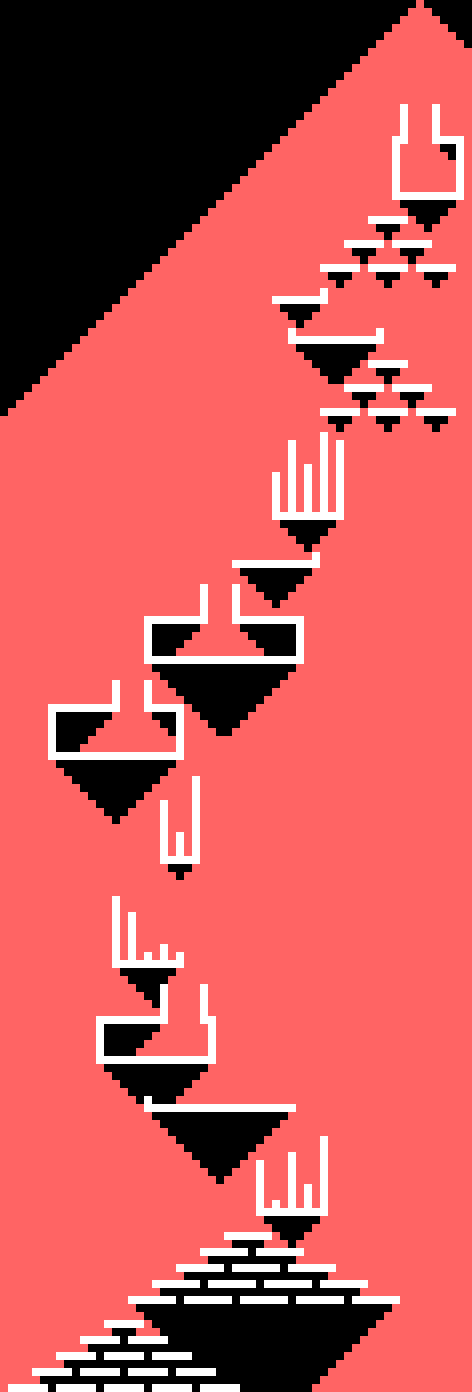

part2: 29076 29076


In [2]:
print("part2:",p(2),29076)


